# Data Visualization
The following script will iterate through all of the data and process it into a single dataframe.

The following are imports that will be used to process the data.

In [63]:
import json
import pandas as pd

The following class declaration will be used to process the data. The class will be used to create an array of Cuboid objects. The cadcd_mappings dictionary will be used to dictate the location of the data in the dataframe.

In [55]:
class Cuboid:
    def __init__(self, position, dimensions, yaw, stationary, uuid, label, camera_used, attributes, points_count) -> None:
        self.attributes = attributes
        self.position = position
        self.dimensions = dimensions
        self.yaw = yaw
        self.stationary = stationary
        self.uuid = uuid
        self.label = label
        self.camera_used = camera_used
        self.points_count = points_count
        pass

    def to_dict(self):
        return {
            "attributes": self.attributes,
            "position": self.position,
            "dimensions": self.dimensions,
            "yaw": self.yaw,
            "stationary": self.stationary,
            "uuid": self.uuid,
            "label": self.label,
            "camera_used": self.camera_used,
            "points_count": self.points_count
        }
        

cadcd_mappings = {
    '2018_03_06': [
        '0001', '0002', '0005', '0006', '0008', '0009', '0010',
        '0012', '0013', '0015', '0016', '0018'
    ],
    '2018_03_07': [
        '0001', '0002', '0004', '0005', '0006', '0007'
    ],
    '2019_02_27': [
        '0002', '0003', '0004', '0005', '0006', '0008', '0009', '0010',
        '0011', '0013', '0015', '0016', '0018', '0019', '0020',
        '0022', '0024', '0025', '0027', '0028', '0030',
        '0031', '0033', '0034', '0035', '0037', '0039', '0040',
        '0041', '0043', '0044', '0045', '0046', '0047', '0049', '0050',
        '0051', '0054', '0055', '0056', '0058', '0059',
        '0060', '0061', '0063', '0065', '0066', '0068', '0070',
        '0072', '0073', '0075', '0076', '0078', '0079',
        '0080', '0082'
    ]
}

In [62]:
data = []
for date in cadcd_mappings:
    for folder in cadcd_mappings[date]:
        file_name = 'data_labels/' + date + '/' + folder + '/3d_ann.json'
        with open(file_name) as f:
            file = json.load(f)
            for obj in file:
                for cuboid in obj['cuboids']:
                    cuboid_data = Cuboid(
                        position=cuboid['position'],
                        dimensions=cuboid['dimensions'],
                        yaw=cuboid['yaw'],
                        stationary=cuboid['stationary'],
                        uuid=cuboid['uuid'],
                        label=cuboid['label'],
                        camera_used=cuboid['camera_used'],
                        attributes=cuboid['attributes'],
                        points_count=cuboid['points_count']
                    )
                    data.append(cuboid_data.to_dict())

df = pd.DataFrame(data)

The following block of code will import libraries to process and visualize the data.

In [58]:
from matplotlib import pyplot as plt
import numpy as np

## Vehicle Type Distribution
The following code block will plot the vehicle type distribution.

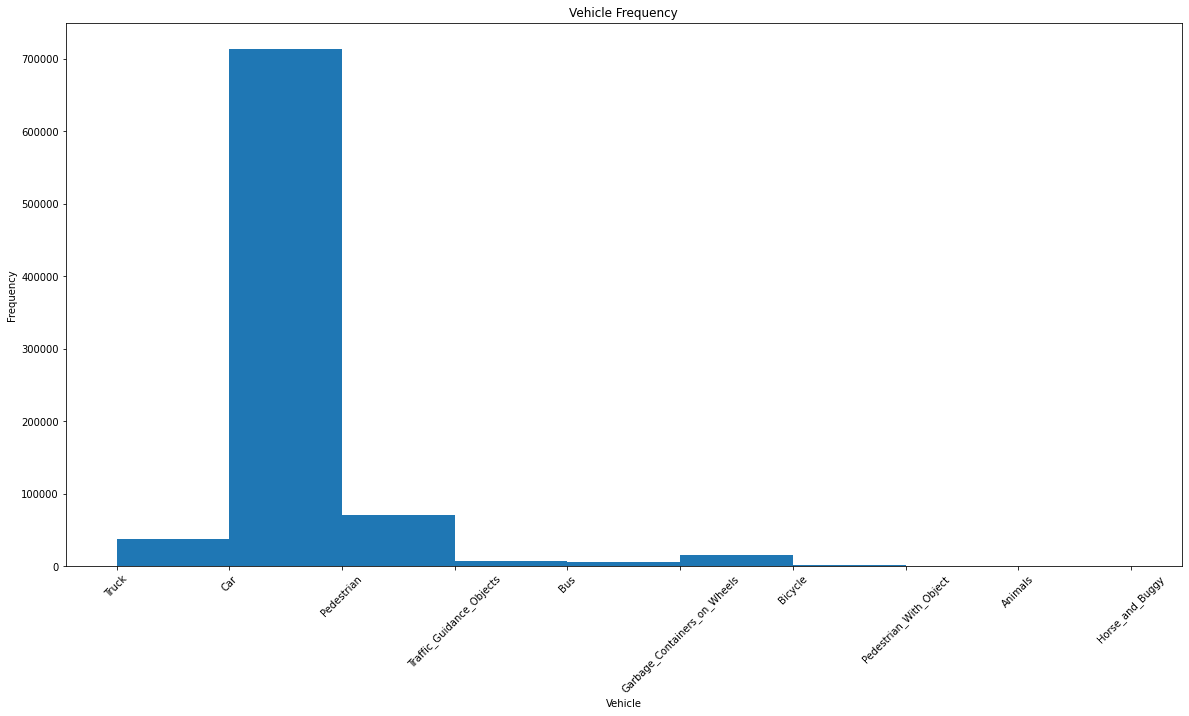

In [70]:
plt.xlabel('Vehicle')
plt.ylabel('Frequency')
plt.title('Vehicle Frequency')
plt.hist(df['label'], bins=np.arange(0, 10, 1))
plt.setp(plt.gca().get_xticklabels(), rotation=45)
plt.show()

The data above indicates that most of the data is for cars, with pedestrians and trucks being the next most common. The least most common is horse and buggy, and animals.

## Camera Used For Data
The following chart will show the frequency of the cameras used.

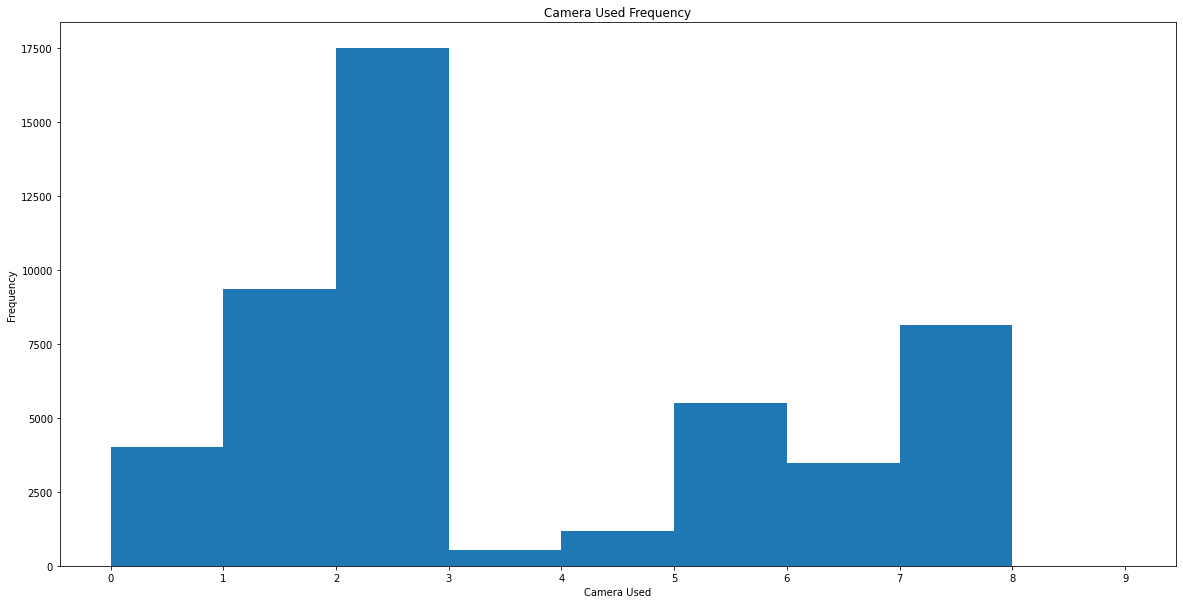

In [77]:
plt.xlabel('Camera Used')
plt.ylabel('Frequency')
plt.title('Camera Used Frequency')
plt.hist(df['camera_used'], bins=np.arange(0, 10, 1))
plt.xticks(np.arange(0, 10, 1))
plt.show()


There are 8 cameras used in the data, and the most common camera used is camera number two.

## Vehicle State Distribution
The following code block will plot the vehicle state distribution.

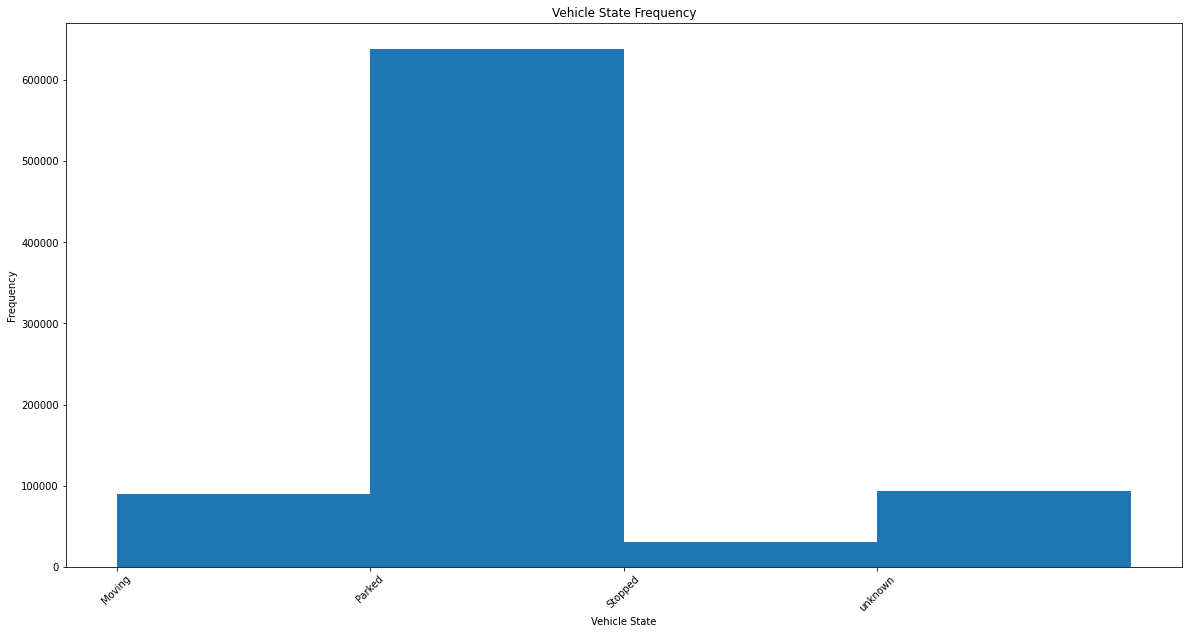

In [81]:
from sre_parse import State


plt.xlabel('Vehicle State')
plt.ylabel('Frequency')
plt.title('Vehicle State Frequency')

states = []
for cuboid in data:
    attr = cuboid['attributes']
    state = attr['state'] if 'state' in attr else 'unknown'
    states.append(state)

plt.hist(states, bins=np.arange(0, 5, 1))
plt.setp(plt.gca().get_xticklabels(), rotation=45)
plt.show()

Most vehicles are in the 'parked' state, followed by 'unknown', then 'moving', then 'stopped'.

## Points Count Histogram
The following code block will plot the points_count scatter plot.

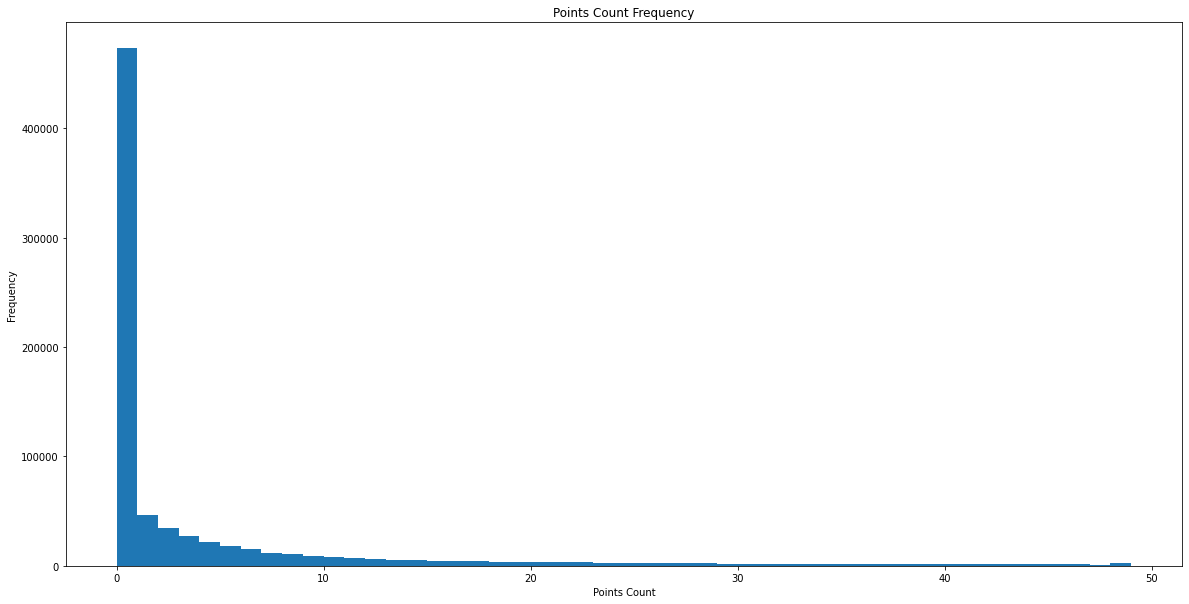

In [85]:
plt.xlabel('Points Count')
plt.ylabel('Frequency')
plt.title('Points Count Frequency')
plt.hist(df['points_count'], bins=np.arange(0, 50, 1))
plt.show()

## Position Box and Whisker Plot
The following code block will plot the position box and whisker plot.

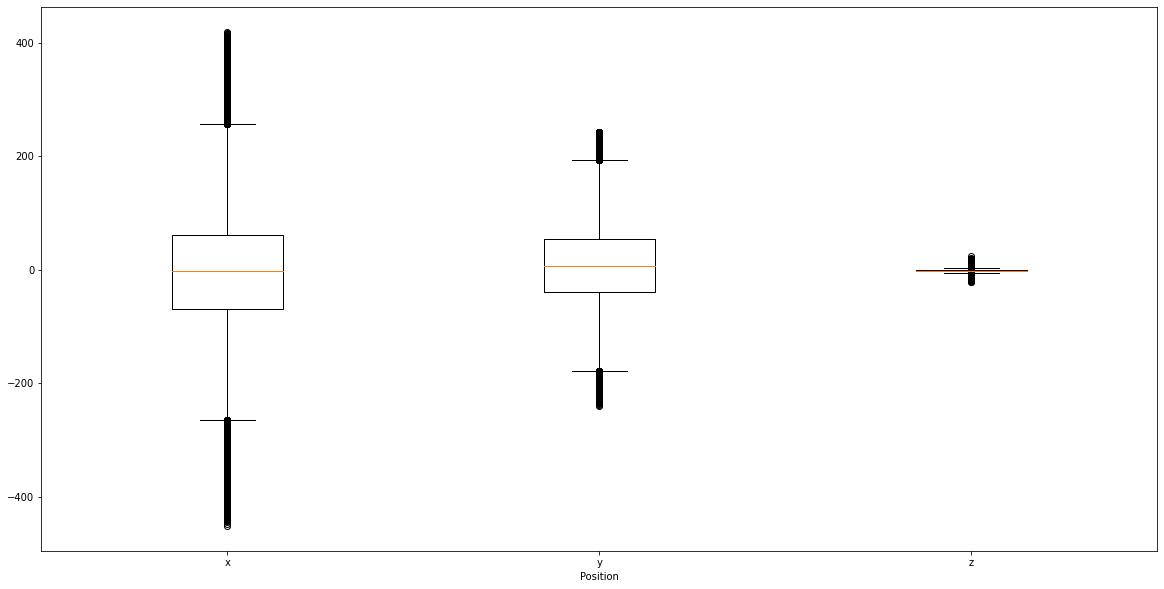

In [89]:
plt.xlabel('Position')
y_ticks = ['x', 'y', 'z']

positions = {
    'x': [],
    'y': [],
    'z': []
}

for cuboid in data:
    position = cuboid['position']
    x_value = position['x']
    y_value = position['y']
    z_value = position['z']
    positions['x'].append(x_value)
    positions['y'].append(y_value)
    positions['z'].append(z_value)

plt.boxplot(positions.values(), labels=positions.keys())
plt.show()

The graph above shows the distribution of the position data.

## Dimension Box and Whisker Plot
The following code block will plot the dimension box and whisker plot.

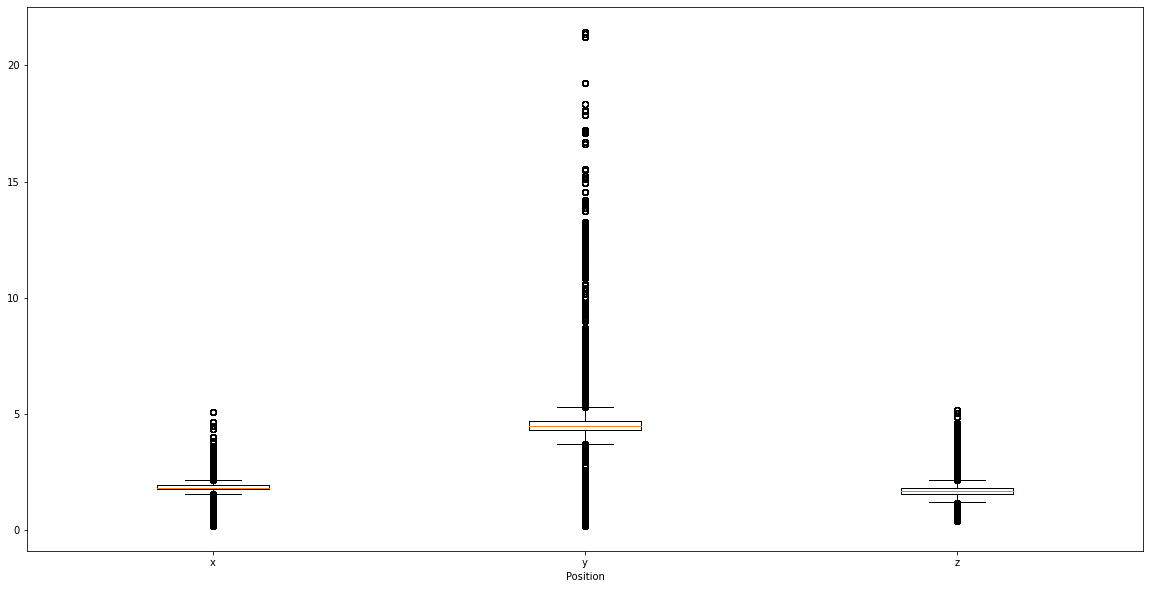

In [90]:
plt.xlabel('Dimensions')
y_ticks = ['x', 'y', 'z']

dimensions = {
    'x': [],
    'y': [],
    'z': []
}

for cuboid in data:
    dimension = cuboid['dimensions']
    x_value = dimension['x']
    y_value = dimension['y']
    z_value = dimension['z']
    dimensions['x'].append(x_value)
    dimensions['y'].append(y_value)
    dimensions['z'].append(z_value)

plt.boxplot(dimensions.values(), labels=dimensions.keys())
plt.show()

The graph above shows the distribution of the vehicle dimension data.